In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
data = pd.read_csv(r"C:\Users\user\Desktop\Fourh Year\CISC 351\\Assignment1-data.csv")
data.head()

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [21]:
data.corr()

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Subject,1.000000,-0.091988,0.097804,0.320738,0.024591,-0.013174,0.061474,0.106774,0.107825,-0.029074,-0.077099,0.029607,-0.039218,-0.015112,-0.005178,0.052308
Density,-0.091988,1.000000,-0.997003,-0.275342,-0.609105,0.018081,-0.483295,-0.696970,-0.808699,-0.623181,-0.566797,-0.505633,-0.318061,-0.494681,-0.359951,-0.335852
%Body Fat,0.097804,-0.997003,1.000000,0.276259,0.610676,-0.025229,0.486798,0.699595,0.811838,0.625624,0.567449,0.502145,0.318188,0.496172,0.359573,0.332994
Age,0.320738,-0.275342,0.276259,1.000000,-0.025821,-0.249817,0.101919,0.160130,0.215244,-0.058415,-0.198478,-0.007356,-0.160205,-0.041350,-0.096394,0.180045
Weight,0.024591,-0.609105,0.610676,-0.025821,1.000000,0.488332,0.829905,0.894186,0.887962,0.941598,0.872500,0.853726,0.751475,0.802219,0.629251,0.733894
Height,-0.013174,0.018081,-0.025229,-0.249817,0.488332,1.000000,0.322541,0.228452,0.191326,0.373496,0.339037,0.504720,0.471075,0.319275,0.322613,0.407759
Neck,0.061474,-0.483295,0.486798,0.101919,0.829905,0.322541,1.000000,0.783662,0.752531,0.734531,0.699429,0.670696,0.586399,0.732844,0.622603,0.747927
Chest,0.106774,-0.696970,0.699595,0.160130,0.894186,0.228452,0.783662,1.000000,0.914920,0.831216,0.736865,0.716103,0.591921,0.732163,0.579004,0.656532
Abdomen,0.107825,-0.808699,0.811838,0.215244,0.887962,0.191326,0.752531,0.914920,1.000000,0.875992,0.773941,0.734017,0.565438,0.688819,0.501648,0.614555
Hip,-0.029074,-0.623181,0.625624,-0.058415,0.941598,0.373496,0.734531,0.831216,0.875992,1.000000,0.898460,0.827038,0.689969,0.739149,0.544596,0.636138


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


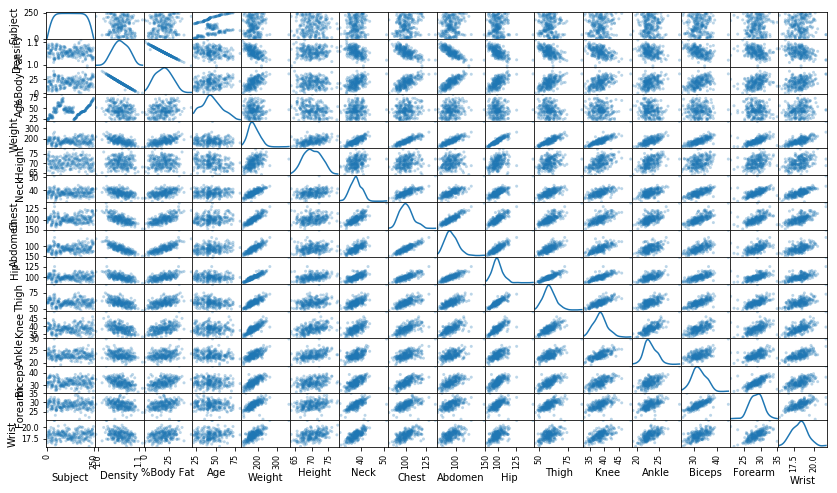

In [22]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

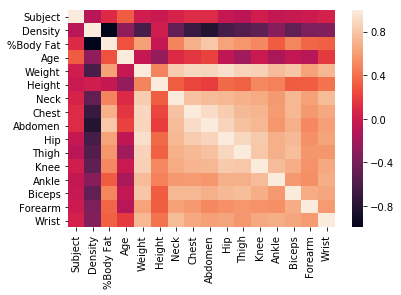

In [23]:
colourplot = sns.heatmap(data.corr())

In [24]:
data.columns.values

array(['Subject', 'Density', '%Body Fat', 'Age', 'Weight', 'Height',
       'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist'], dtype=object)

In [25]:
dx = pd.DataFrame(data, columns=data.columns.values)
target = pd.DataFrame(data["%Body Fat"], columns = ["%Body Fat"])

In [26]:
X = dx["Density"]
y = target["%Body Fat"]
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.119e+04
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          1.16e-277
Time:                        21:25:35   Log-Likelihood:                -245.51
No. Observations:                 250   AIC:                             495.0
Df Residuals:                     248   BIC:                             502.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        487.8412      2.310    211.169      0.000     483.291     492.391
Density     -444.0917      2.188   -202.942      0.000    -448.402    -439.782
==============================================================================
Omnibus:                      409.880   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190160.225
Skew:                          -7.956   Prob(JB):                         0.00
Kurtosis:                     137.172   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = dx[["Density", "Abdomen"]]
y = target["%Body Fat"]
X = sm.add_constant(X)


model2 = sm.OLS(y, X.astype(float)).fit()
predictions = model2.predict(X)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.082e+04
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          4.62e-276
Time:                        21:25:35   Log-Likelihood:                -243.63
No. Observations:                 250   AIC:                             493.3
Df Residuals:                     247   BIC:                             503.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.5726      4.402    109.167      0.000     471.902     489.243
Density     -438.3003      3.700   -118.469      0.000    -445.587    -431.013
Abdomen        0.0125      0.006      1.936      0.054      -0.000       0.025
==============================================================================
Omnibus:                      406.732   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184884.000
Skew:                          -7.838   Prob(JB):                         0.00
Kurtosis:                     135.299   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X = dx[["Chest", "Abdomen", "Thigh", "Hip", "Knee"]]
y = target["%Body Fat"]
X = sm.add_constant(X)


model3 = sm.OLS(y, X.astype(float)).fit()
predictions = model3.predict(X)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     115.0
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           4.18e-62
Time:                        21:25:35   Log-Likelihood:                -733.94
No. Observations:                 250   AIC:                             1480.
Df Residuals:                     244   BIC:                             1501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7777      5.900     -1.488      0.138     -20.399       2.843
Chest         -0.1887      0.087     -2.158      0.032      -0.361      -0.016
Abdomen        1.0093      0.079     12.841      0.000       0.854       1.164
Thigh          0.2233      0.132      1.696      0.091      -0.036       0.483
Hip           -0.4636      0.127     -3.644      0.000      -0.714      -0.213
Knee          -0.3475      0.226     -1.537      0.126      -0.793       0.098
==============================================================================
Omnibus:                        1.304   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.225
Skew:                           0.033   Prob(JB):                        0.542
Kurtosis:                       2.664   Cond. No.                     3.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,408.9,const
1,6.3,Chest
2,8.4,Abdomen
3,5.6,Thigh
4,9.8,Hip
5,3.5,Knee
